In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from PIL import Image
import json
np.set_printoptions(precision=3,suppress=True)
from tensorflow.keras.applications.vgg16 import decode_predictions
import numpy as np
import json

dummy_output = np.zeros((1, 1000))
dummy_output[0][0] = 1.0
decoded = decode_predictions(dummy_output, top=1000)[0]


imagenet_classes = [entry[1] for entry in sorted(decoded, key=lambda x: int(x[0][1:]))]

with open("imagenet_classes.json", "w") as f:
    json.dump(imagenet_classes, f)

print("Saved imagenet_classes.json with", len(imagenet_classes), "classes.")


model = keras.applications.VGG16(weights='imagenet',include_top=True)
classes = json.loads(open('imagenet_classes.json','r').read())

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step 
Saved imagenet_classes.json with 1000 classes.


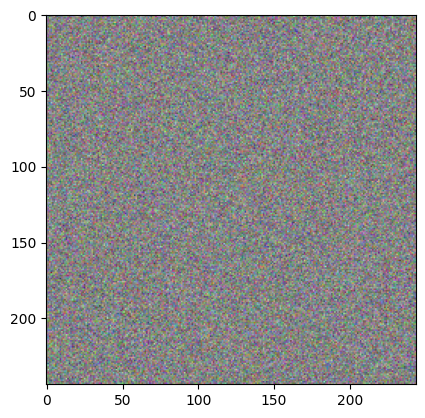

In [9]:
x = tf.Variable(tf.random.normal((1,244,244,3)))

def normalize(img):
    return (img-tf.reduce_min(img))/(tf.reduce_max(img)-tf.reduce_min(img))

plt.imshow(normalize(x[0]))

In [12]:
def plot_result(x):
    res = model(x)[0]
    cls = tf.argmax(res)
    print(f"Predicted class: {cls} ({classes[cls]})")
    print(f"Probability of predicted class = {res[cls]}")
    fig,ax = plt.subplots(1,2,figsize=(15,2.5),gridspec_kw = { "width_ratios" : [1,5]} )
    ax[0].imshow(normalize(x[0]))
    ax[0].axis('off')
    ax[1].bar(range(1000),res,width=3)
    plt.show()

plot_result(x)


ValueError: Input 0 of layer "vgg16" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 244, 244, 3)